# Portefeuille "All Weather" de Ray Dalio

<img src="All-Weather.png" alt="regimes economiques" width="400"/>


In [20]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Selection des dates pour les données historiques
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime.now()


## Selection des actifs et allocation du portefeuille
- **Obligations Long Terme** (40%) : iShares 20+ Year Treasury Bond ETF
- **Actions** (30%) : Vanguard Total Stock Market Index Fund ETF Shares
- **Obligations Moyen Terme** (15%) : iShares 3-7 Year Treasury Bond
- **Or** (7.5%) : SPDR Gold Shares
- **Commodities** (7.5%) : Lyxor Commodities Thomson Reuters/Corecommodity Crb
- (**Actions (avec smart beta)** : Vanguard Value ETF)

<img src="chart_pie_all_weather.png" alt="allocation" width="800"/>


In [21]:
# Importation des données historiques (Yahoo Finance)
OLT = web.DataReader('TLT', 'yahoo', start, end)
actions = web.DataReader('VTI', 'yahoo', start, end)
OMT = web.DataReader('IEI', 'yahoo', start, end)
gold = web.DataReader('GLD', 'yahoo', start, end)
commodities = web.DataReader('GSG', 'yahoo', start, end)

index = web.DataReader('^GSPC', 'yahoo', start, end) #S&P500
actions_smart_beta = web.DataReader('VUG', 'yahoo', start, end)
commodities.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,54.900002,53.500000,53.750000,54.660000,361100,54.660000
2008-01-03,55.150002,54.320000,54.639999,54.660000,165100,54.660000
2008-01-04,55.020000,53.730000,54.400002,54.299999,194100,54.299999
2008-01-07,54.049999,52.639999,54.049999,52.680000,227200,52.680000
2008-01-08,54.160000,53.490002,53.810001,53.700001,340600,53.700001


## Computes daily Returns and normed Returns

In [22]:
assets = [OLT, actions, actions_smart_beta, OMT, gold, commodities, index]
for asset in assets:
    asset['Returns'] = asset['Adj Close']/asset['Adj Close'].shift(1) - 1
    asset['Normed Returns'] = asset['Adj Close']/asset.iloc[0]['Adj Close']


## Création des portefeuilles

In [23]:
# Sans smart beta
all_weather_ptf = pd.concat([OLT['Adj Close'],
                             actions['Adj Close'],
                             OMT['Adj Close'],
                             gold['Adj Close'],
                             commodities['Adj Close']], axis=1)

all_weather_ptf.columns = ['OLT', 'actions', 'OMT', 'gold', 'commodities']

In [24]:
# Avec smart beta
all_weather_ptf_smart_beta = pd.concat([OLT['Adj Close'],
                                        actions_smart_beta['Adj Close'],
                                        OMT['Adj Close'],
                                        gold['Adj Close'],
                                        commodities['Adj Close']], axis=1)

all_weather_ptf_smart_beta.columns = ['OLT', 'actions smart beta', 'OMT', 'gold', 'commodities']

# Affichage du portefeuille (sans smart)
all_weather_ptf.head()


,OLT,actions,OMT,gold,commodities
Date,,,,,
2008-01-02,64.478897,55.718601,85.220627,84.860001,54.660000
2008-01-03,64.390068,55.652542,85.349228,85.570000,54.660000
2008-01-04,64.403732,54.164703,85.638405,85.129997,54.299999
2008-01-07,64.683838,54.191891,85.726814,84.769997,52.680000
2008-01-08,64.608665,53.220707,85.791069,86.779999,53.700001


## Allocation du portefeuille avec les pondérations de Ray Dalio

In [25]:
# Sans smart beta
all_weather_ptf['Allocated'] = 0.4 * all_weather_ptf['OLT'] + \
                          0.3 * all_weather_ptf['actions'] + \
                          0.15 * all_weather_ptf['OMT'] + \
                          0.075 * all_weather_ptf['gold'] + \
                          0.075 * all_weather_ptf['commodities']

all_weather_ptf['Normed Returns'] = all_weather_ptf['Allocated'] /  all_weather_ptf.iloc[0]['Allocated']

In [26]:
# Avec smart beta
all_weather_ptf_smart_beta['Allocated'] = 0.4 * all_weather_ptf_smart_beta['OLT'] + \
                          0.3 * all_weather_ptf_smart_beta['actions smart beta'] + \
                          0.15 * all_weather_ptf_smart_beta['OMT'] + \
                          0.075 * all_weather_ptf_smart_beta['gold'] + \
                          0.075 * all_weather_ptf_smart_beta['commodities']

all_weather_ptf_smart_beta['Normed Returns'] = all_weather_ptf_smart_beta['Allocated'] /  all_weather_ptf_smart_beta.iloc[0]['Allocated']

all_weather_ptf_smart_beta.head()

,OLT,actions smart beta,OMT,gold,commodities,Allocated,Normed Returns
Date,,,,,,,
2008-01-02,64.478897,54.292011,85.220627,84.860001,54.660000,65.326256,1.000000
2008-01-03,64.390068,54.411358,85.349228,85.570000,54.660000,65.399069,1.001115
2008-01-04,64.403732,52.680901,85.638405,85.129997,54.299999,64.868774,0.992997
2008-01-07,64.683838,52.672363,85.726814,84.769997,52.680000,64.843016,0.992603
2008-01-08,64.608665,51.649437,85.791069,86.779999,53.700001,64.742958,0.991071


## Tracé des performances
### Sans smart beta

Text(0, 0.5, 'Normed Returns')

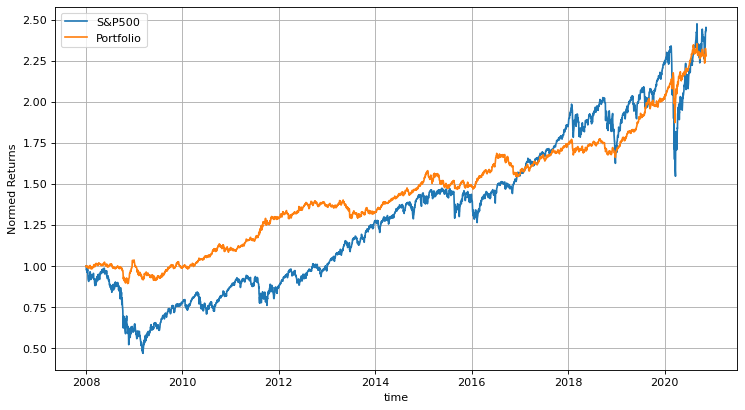

In [27]:
plt.figure(num=None, figsize=(11, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(index['Normed Returns'], label='S&P500')
plt.plot(all_weather_ptf['Normed Returns'], label='Portfolio')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Normed Returns')

Text(0, 0.5, 'Normed Returns')

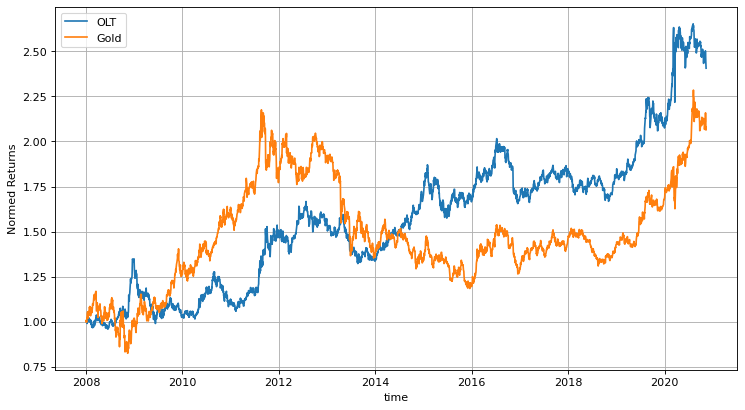

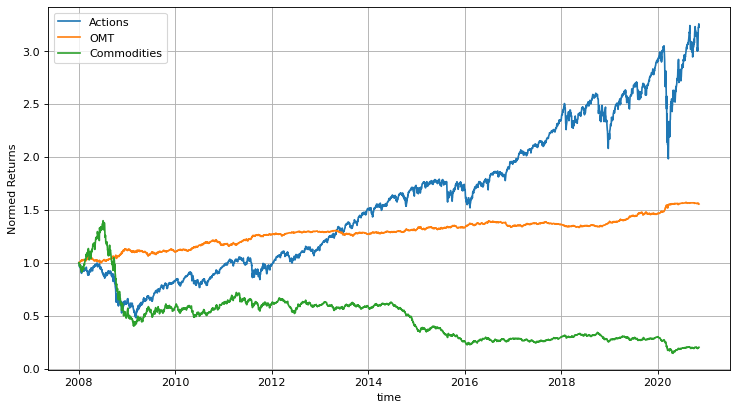

In [28]:
plt.figure(num=1, figsize=(11, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(OLT['Normed Returns'], label='OLT')
plt.plot(gold['Normed Returns'], label='Gold')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Normed Returns')

plt.figure(num=2, figsize=(11, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(actions['Normed Returns'], label='Actions')
plt.plot(OMT['Normed Returns'], label='OMT')
plt.plot(commodities['Normed Returns'], label='Commodities')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Normed Returns')

## Tracé des performances
### Avec smart beta (depuis 2008)

Text(0, 0.5, 'Normed Returns')

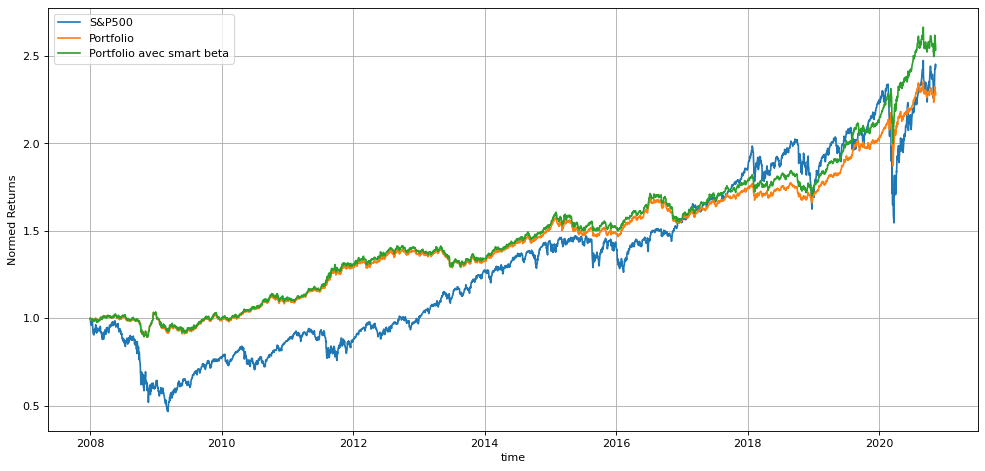

In [29]:
plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(index['Normed Returns'], label='S&P500')
plt.plot(all_weather_ptf['Normed Returns'], label='Portfolio')
plt.plot(all_weather_ptf_smart_beta['Normed Returns'], label='Portfolio avec smart beta')

plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Normed Returns')

### Avec smart beta (depuis 2020)

Text(0, 0.5, 'Normed Returns')

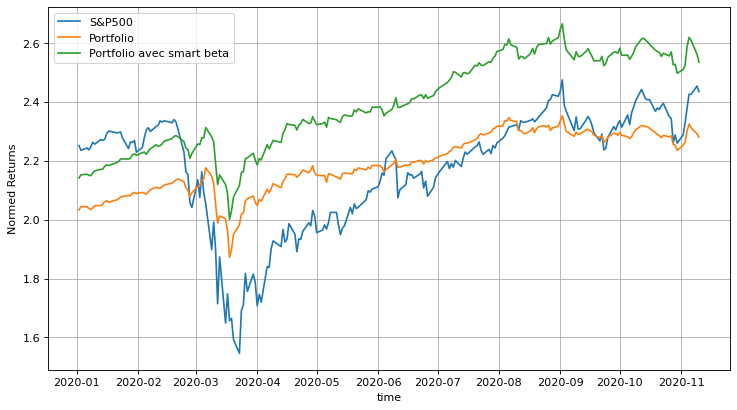

In [30]:
debut_2020 = datetime.datetime(2020, 1, 1)
plt.figure(num=None, figsize=(11, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(index[index.index > debut_2020]['Normed Returns'], label='S&P500')
plt.plot(all_weather_ptf[all_weather_ptf.index > debut_2020]['Normed Returns'], label='Portfolio')
plt.plot(all_weather_ptf_smart_beta[all_weather_ptf_smart_beta.index > debut_2020]['Normed Returns'], label='Portfolio avec smart beta')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Normed Returns')

## Limite de cette simulation
- Non-implémentation du rebalancing bi-annuel
- Non-prise en compte des coûts de rebalancing

Soucres :
- Smart beta ETF : https://etfdb.com/themes/smart-beta-etfs/